In [2]:
import chess
import chess.svg
import board_to_array 
import importlib

# Reload the module
importlib.reload(board_to_array)

<module 'board_to_array' from '/Users/vincecimino/dev/beat-a-gm-full/beat-a-gm-code/board_to_array.py'>

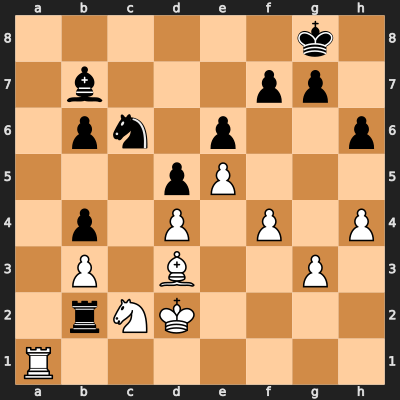

In [3]:
board = chess.Board("6k1/1b3pp1/1pn1p2p/3pP3/1p1P1P1P/1P1B2P1/1rNK4/R7 b - - 3 39")
board_array = board_to_array.board_to_array(board)
board_svg = chess.svg.board(board, size=400)
board_svg

In [4]:
black_piece_mobility = board_to_array.black_piece_mobility(board)
black_piece_mobility

AttributeError: module 'board_to_array' has no attribute 'black_piece_mobility'

In [5]:
import flip_color
flipped_board = flip_color.flip_color(board)
flipped_board.fen()

'6k1/1b3pp1/1pn1p2p/3pP3/1p1P1P1P/1P1B2P1/1rNK4/R7 w - - 3 39'

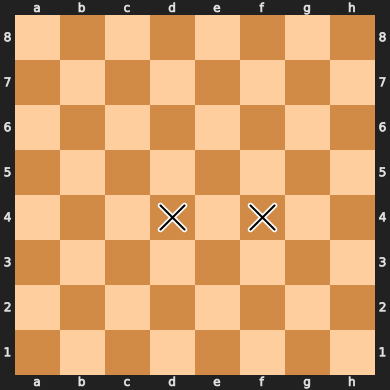

In [6]:
board.attackers(chess.WHITE, chess.E5)


In [7]:
board.color_at(chess.E5)

True

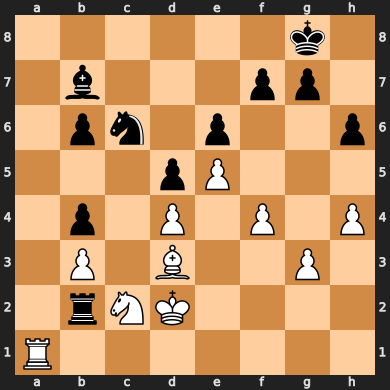

In [8]:
board

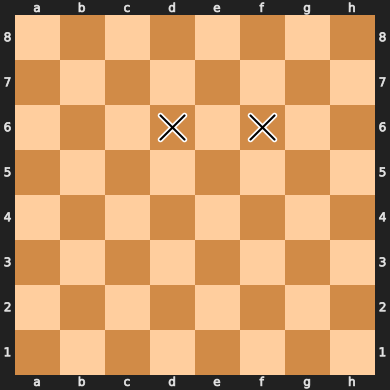

In [9]:
 board.attacks(chess.E5)

In [10]:
import requests
data = requests.get("http://127.0.0.1:5000/get-pawn-moves")
data

<Response [404]>

In [11]:
data.text

'<!doctype html>\n<html lang=en>\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'

In [12]:
data.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
import tensorflow as tf
import numpy as np

In [14]:
num_categories = 8
input_shape = (8, 8, 4)  # 8x8 board with 4 features (channels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 32)          1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                        

In [4]:
N = 500 #number of positions I am planning on
training_X = np.zeros((N, 8, 8, 4))
training_Y = np.zeros((N, num_categories))

In [5]:
i = 0

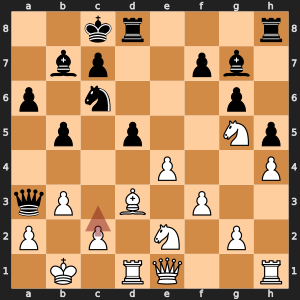

c2c3


 5


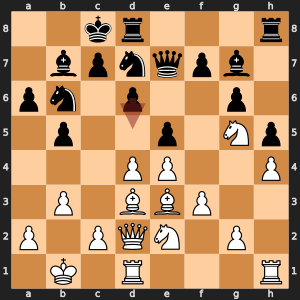

d6d5


 7


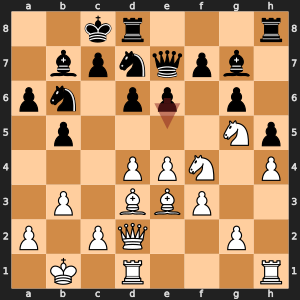

e6e5


 7


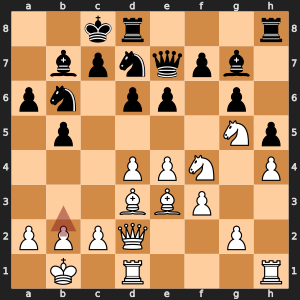

b2b3


 5


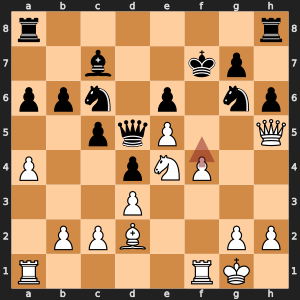

f4f5


 7


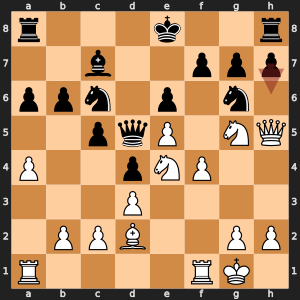

h7h6


 8


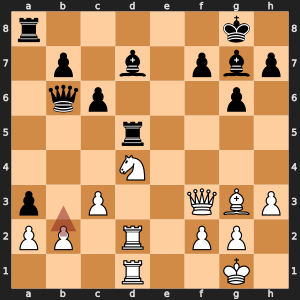

b2b3


 1


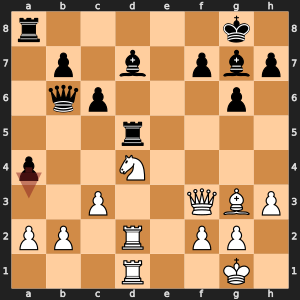

a4a3


 7


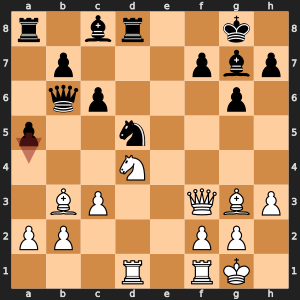

a5a4


 8


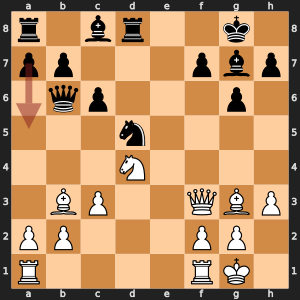

a7a5


 1


In [29]:
import requests
import chess.svg
from board_to_array import board_to_array, structural_piece_mobility
from flip_color import flip_color
from IPython.display import SVG, display
from board_array_reverse import board_array_reverse, array_reverse
pos_stack = []
while (i<500):
    while len(pos_stack)==0:
        #refill positions
        data = requests.get("http://127.0.0.1:5000/get-pawn-moves").json()
        pos_stack = data
    pos_obj = pos_stack.pop()
    fen = pos_obj['fen']
    uci = pos_obj['uci']
    board = chess.Board(fen)
    player = board.color_at(board.parse_uci(uci).from_square)
    opponent = not player
    display(SVG(chess.svg.board(board=board, size=300, arrows = [chess.svg.Arrow(board.parse_uci(uci).from_square, \
                                                                                 board.parse_uci(uci).to_square, color='red')])))
    print(uci)
    pawn_move_type = int(input())
    if pawn_move_type == 0: 
        break
    #convert the board into 4 numpy arrays: board before, board after, piece mobility diff, enemy piece mobility after
    board_array_before = board_to_array(board)
    piece_mobility_before = structural_piece_mobility(board, player)
    enemy_piece_mobility_before = structural_piece_mobility(flip_color(board), opponent)
    board.push_uci(uci)
    board_array_after = board_to_array(board)
    piece_mobility_after = structural_piece_mobility(flip_color(board), player)
    enemy_piece_mobility_after = structural_piece_mobility(board, opponent)
    piece_mobility_diff = piece_mobility_after - piece_mobility_before
    enemy_piece_mobility_diff = enemy_piece_mobility_after - enemy_piece_mobility_before

    #if player is black, then reverse all of the arrays and board reverse the positions (multiply everything by -1)
    if player == chess.BLACK:
        board_array_before = board_array_reverse(board_array_before)
        board_array_after = board_array_reverse(board_array_after)
        piece_mobility_diff = array_reverse(piece_mobility_diff)
        enemy_piece_mobility_diff = array_reverse(enemy_piece_mobility_diff)
    training_X[i, :, :, 0] = board_array_before
    training_X[i, :, :, 1] = board_array_after
    training_X[i, :, :, 2] = piece_mobility_diff
    training_X[i, :, :, 3] = enemy_piece_mobility_diff
    one_hot_arr = np.zeros(num_categories)
    one_hot_arr[pawn_move_type-1] = 1
    training_Y[i, :] = one_hot_arr
    i+=1
    #print(board_array_before)
    #print(board_array_after)
    #print(piece_mobility_diff)
    #print(enemy_piece_mobility_diff)

In [28]:
training_X[

490

In [30]:
training_X[499, :, :, 0]

array([[ 4., -0.,  3.,  4., -0., -0.,  6., -0.],
       [ 1.,  1., -0., -0., -0.,  1.,  3.,  1.],
       [-0.,  5.,  1., -0., -0., -0.,  1., -0.],
       [-0., -0., -0.,  2., -0., -0., -0., -0.],
       [-0., -0., -0., -2., -0., -0., -0., -0.],
       [-0., -3., -1., -0., -0., -5., -3., -1.],
       [-1., -1., -0., -0., -0., -1., -1., -0.],
       [-4., -0., -0., -0., -0., -4., -6., -0.]])

In [21]:
i

15

In [31]:
training_Y[499]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
model.fit(training_X, training_Y, epochs=50)


Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 0.9111 - accuracy: 0.7380
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7975 - accuracy: 0.7660
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.8200
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5570 - accuracy: 0.8740
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.9060
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.9240
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.9560
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9620
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9700
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9740
Epoch 11/50
16/16 [

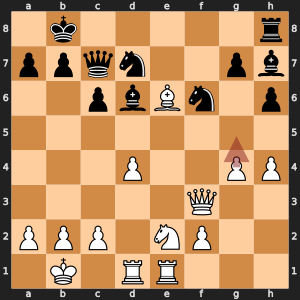

1/1 [==============================] - 0s 10ms/step
[[3.1660830e-03 3.6980998e-04 6.3151568e-01 3.3375188e-03 4.1023064e-03
  3.2024051e-03 3.3036664e-01 2.3939526e-02]]
1/1 [==============================] - 0s 9ms/step
3


In [66]:
while len(pos_stack)==0:
    #refill positions
    data = requests.get("http://127.0.0.1:5000/get-pawn-moves").json()
    pos_stack = data
pos_obj = pos_stack.pop()
fen = pos_obj['fen']
uci = pos_obj['uci']
board = chess.Board(fen)
player = board.color_at(board.parse_uci(uci).from_square)
opponent = not player
display(SVG(chess.svg.board(board=board, size=300, arrows = [chess.svg.Arrow(board.parse_uci(uci).from_square, \
                                                                             board.parse_uci(uci).to_square, color='red')])))

#convert the board into 4 numpy arrays: board before, board after, piece mobility diff, enemy piece mobility after
board_array_before = board_to_array(board)
piece_mobility_before = structural_piece_mobility(board, player)
enemy_piece_mobility_before = structural_piece_mobility(flip_color(board), opponent)
board.push_uci(uci)
board_array_after = board_to_array(board)
piece_mobility_after = structural_piece_mobility(flip_color(board), player)
enemy_piece_mobility_after = structural_piece_mobility(board, opponent)
piece_mobility_diff = piece_mobility_after - piece_mobility_before
enemy_piece_mobility_diff = enemy_piece_mobility_after - enemy_piece_mobility_before

#if player is black, then reverse all of the arrays and board reverse the positions (multiply everything by -1)
if player == chess.BLACK:
    board_array_before = board_array_reverse(board_array_before)
    board_array_after = board_array_reverse(board_array_after)
    piece_mobility_diff = array_reverse(piece_mobility_diff)
    enemy_piece_mobility_diff = array_reverse(enemy_piece_mobility_diff)
data_point = np.stack([board_array_before, board_array_after, piece_mobility_diff, enemy_piece_mobility_diff], axis=-1)
data_point = np.expand_dims(data_point, axis=0)
print(model.predict(data_point))
prediction = np.argmax(model.predict(data_point), axis=1)[0]
print(prediction+1)

In [55]:
model.save("models/pawn-cnn-1.keras")

In [52]:
import tensorflow as tf

num_categories = 8
input_shape = (8, 8, 4)  # 8x8 board with 4 features (channels)

model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flattening the layers
    tf.keras.layers.Flatten(),

    # Fully Connected Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 batch_normalization (Batch  (None, 8, 8, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)         

In [53]:
model.fit(training_X, training_Y, epochs=15)

Epoch 1/15
16/16 [==============================] - 0s 6ms/step - loss: 2.7245 - accuracy: 0.1360
Epoch 2/15
16/16 [==============================] - 0s 6ms/step - loss: 2.5145 - accuracy: 0.1280
Epoch 3/15
16/16 [==============================] - 0s 6ms/step - loss: 2.2605 - accuracy: 0.1620
Epoch 4/15
16/16 [==============================] - 0s 6ms/step - loss: 2.2098 - accuracy: 0.1720
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 2.2335 - accuracy: 0.1560
Epoch 6/15
16/16 [==============================] - 0s 6ms/step - loss: 2.1887 - accuracy: 0.1840
Epoch 7/15
16/16 [==============================] - 0s 6ms/step - loss: 2.1647 - accuracy: 0.1460
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 2.1692 - accuracy: 0.1240
Epoch 9/15
16/16 [==============================] - 0s 7ms/step - loss: 2.0953 - accuracy: 0.2000
Epoch 10/15
16/16 [==============================] - 0s 7ms/step - loss: 2.0516 - accuracy: 0.1740
Epoch 11/15
16/16 [

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

num_categories = 8
input_shape = (8, 8, 4)  # 8x8 board with 4 features (channels)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout
    Dense(num_categories, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
model.fit(training_X, training_Y, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 batch_normalization_4 (Bat  (None, 8, 8, 32)          128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 32)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)         

In [62]:
num_categories = 8
input_shape = (8, 8, 4)  # 8x8 board with 4 features (channels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
model.fit(training_X, training_Y, epochs=13)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 8, 8, 32)          1184      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                65600     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                      

In [67]:
np.save('models/training_X.npy', training_X)
np.save('models/training_Y.npy', training_Y)